<a href="https://colab.research.google.com/github/mattsmiths/biol470/blob/main/week8/BIOL470_spikeProc_SpikeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Click to copy the class code repository
!git clone https://github.com/mattsmiths/biol470.git

Cloning into 'biol470'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 283 (delta 22), reused 18 (delta 11), pack-reused 238 (from 2)
Receiving objects: 100% (283/283), 116.28 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Updating files: 100% (140/140), done.


In [2]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os
import pickle

# New Analysis


In [3]:
import scipy.signal as sg
from scipy.signal import find_peaks

In [5]:

select_goup = 'heat_cool' # @param ["odor_air", "odor_peppermint", "odor_nectar","light_red", "light_blue", "heat_applied","heat_baseline", "heat_cool"]

if select_goup == 'odor_air':
  videoPath = '/content/biol470/week8/electrode_data/odor_stimulus/baseline_Air1_pulse'
elif select_goup == 'odor_peppermint':
  videoPath = '/content/biol470/week8/electrode_data/odor_stimulus/baseline Peppermint1_pulse'
elif select_goup == 'odor_nectar':
  videoPath = '/content/biol470/week8/electrode_data/odor_stimulus/baseline Necter1_pulse'

elif select_goup == 'light_red':
  videoPath = '/content/biol470/week8/electrode_data/light_stimulus/red.test_pulse'
elif select_goup == 'light_blue':
  videoPath = '/content/biol470/week8/electrode_data/light_stimulus/blue.test_pulse'
elif select_goup == 'Fly_B_Peppermint':
  videoPath = '/content/drive/MyDrive/BIOL470/Activity_3/group_matt/Fly_B/group_matt_flyB_peppermint_2025-02-06_15-57-51.avi'

elif select_goup == 'heat_applied':
  videoPath = '/content/biol470/week8/electrode_data/heat_stimulus/applied heat_pulse'
elif select_goup == 'heat_baseline':
  videoPath = '/content/biol470/week8/electrode_data/heat_stimulus/b4 heat baseline_pulse'
elif select_goup == 'heat_cool':
  videoPath = '/content/biol470/week8/electrode_data/heat_stimulus/cooling exp1_pulse'

in1 = open(videoPath,'rb')
pulse_data = pickle.load(in1)
in1.close()

if os.path.isdir('/content/%s/'%(videoPath.split('/')[-1])) == False:
  os.mkdir('/content/%s/'%(videoPath.split('/')[-1]))

In [6]:
# add a highpass filter for noise in data
b, a = sg.butter(4, 100. / (7500 / 2.), 'highpass')
x_fil = sg.filtfilt(b, a, pulse_data[0][0])

In [7]:
data_full = []
for ee in  pulse_data[0]:
    data_full+=list(ee)
dtest = data_full[:35000] - np.nanmean(data_full[:35000])
x_fil_II = sg.filtfilt(b, a, dtest)
thresh = np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2)
peaks, _ = find_peaks(x_fil_II*-1,height=thresh)

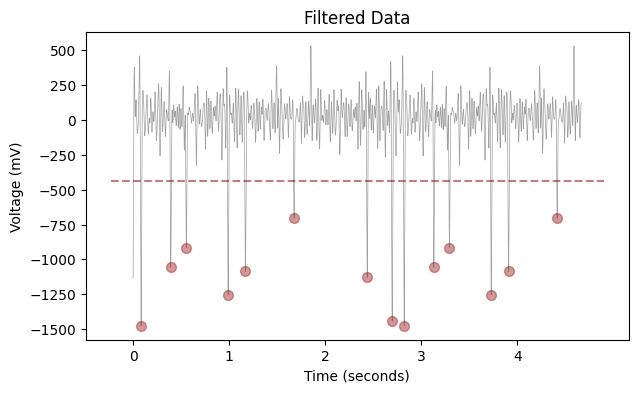

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(x_fil_II,linewidth=0.5,color=(0.25,0.25,0.25,0.5))
plt.title('Filtered Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (mV)')
#xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
xticks = np.arange(0,len(x_fil_II),7500)
xlabels = np.arange(0,len(xticks))
l = plt.xticks(xticks,xlabels)

a1 = plt.axis()
plt.plot([a1[0],a1[1]],[np.nanmean(x_fil_II)-(np.nanstd(x_fil_II)*2),np.nanmean(x_fil_II)-(np.nanstd(x_fil_II)*2)],linestyle='--',color=(0.5,0,0,0.5))
plt.plot()
for ele in peaks:
    plt.scatter(ele,x_fil_II[ele],marker='o',s=50,color=(0.65,0.2,0.2,0.5))

plt.savefig('/content/%s/%s_spikePeaks.png'%(videoPath.split('/')[-1],videoPath.split('/')[-1]),dpi=100)

<ipython-input-137-91a790fe9ca9>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


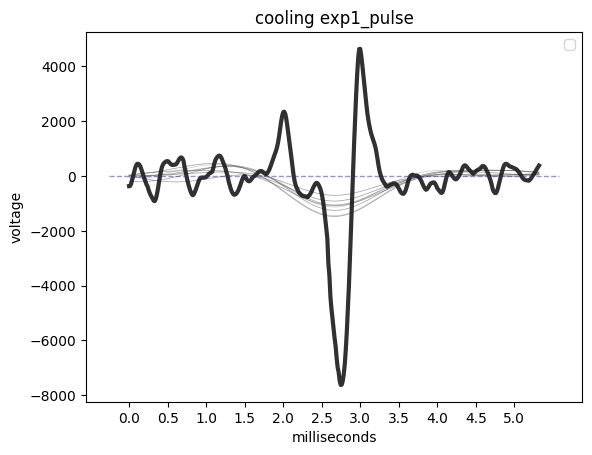

In [ ]:
plt.figure()
window1 = 200
tt = []
for ele in peaks:
    if ele - window1 <=0:continue
    if ele + window1 >=len(x_fil_II):continue
    plt.plot(np.arange(window1*2),x_fil_II[ele-window1:ele+window1],linewidth=0.5,color=(0.3,0.3,0.3,0.3))
    tt.append(dtest[ele-window1:ele+window1])
airT = tt.copy()
a1 = plt.axis()
#plt.plot([window1,window1],[a1[2],a1[3]],linewidth=3,linestyle='--',color=(0.65,0.2,0.2,0.75),label='alignment')
plt.legend()

plt.plot(np.arange(window1*2),np.nanmean(tt,0),linewidth=3,color=(0.1,0.1,0.1,0.9))

tt = ((window1/(13*50))*2)+1
tt = np.arange(0,window1*2,37.5)
oo = plt.xticks(tt,np.arange(0,0.5*len(tt),0.5))
plt.xlabel('milliseconds')
plt.ylabel('voltage')
plt.plot([a1[0],a1[1]],[0,0],linewidth=1,linestyle='--',color=(0.2,0.2,0.5,0.5),label='alignment')
plt.title(videoPath.split('/')[-1])
plt.savefig('spikes_aligned.png',dpi=300)
#plt.savefig('/content/%s/%s_spikePeaks.png'%(videoPath.split('/')[-1],videoPath.split('/')[-1]),dpi=300)

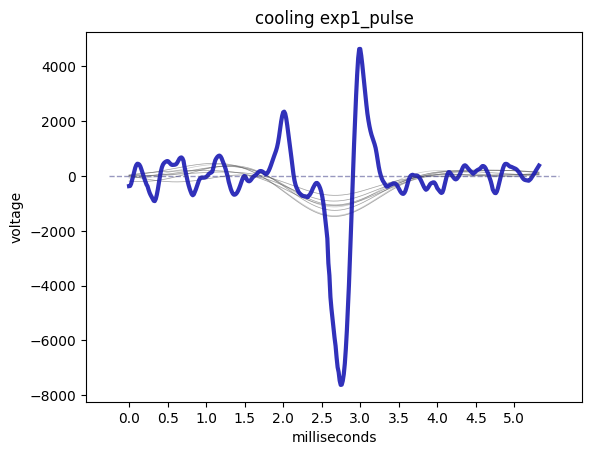

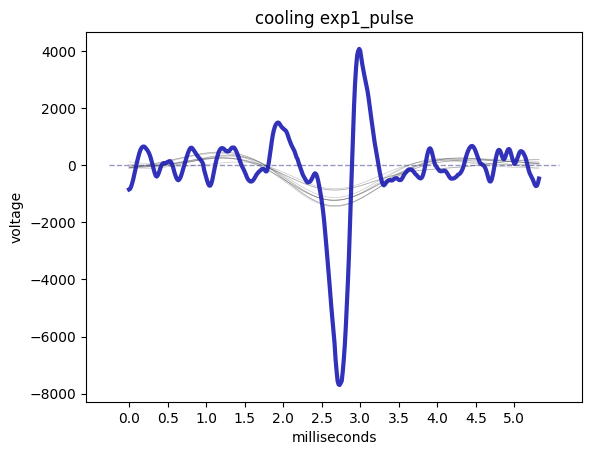

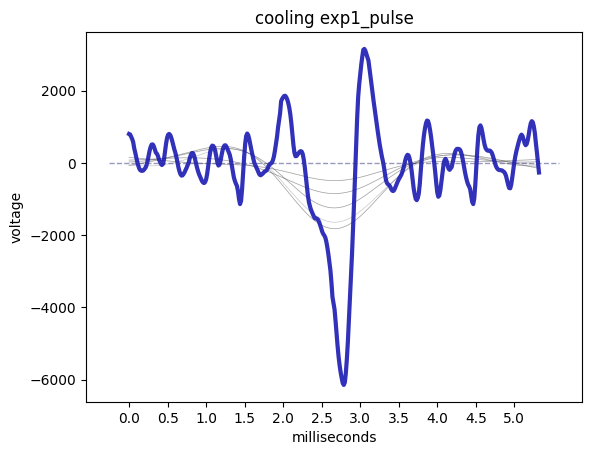

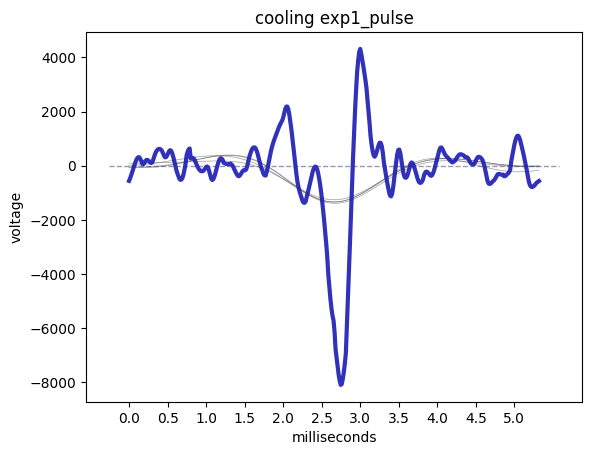

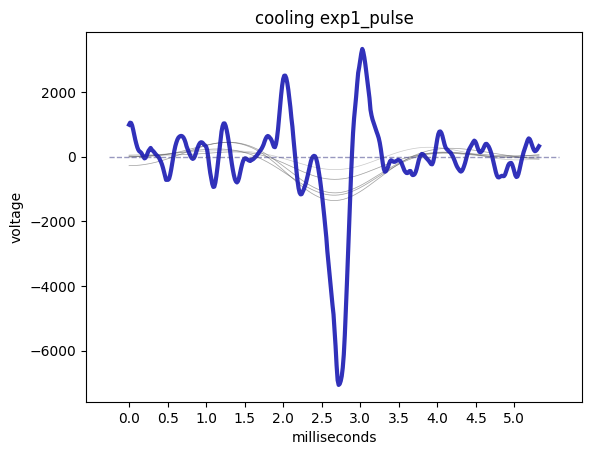

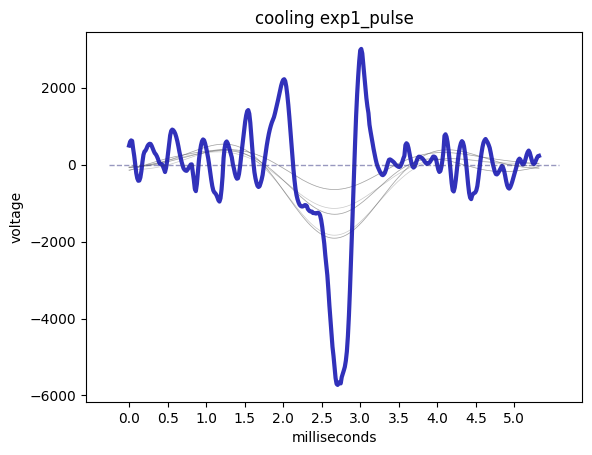

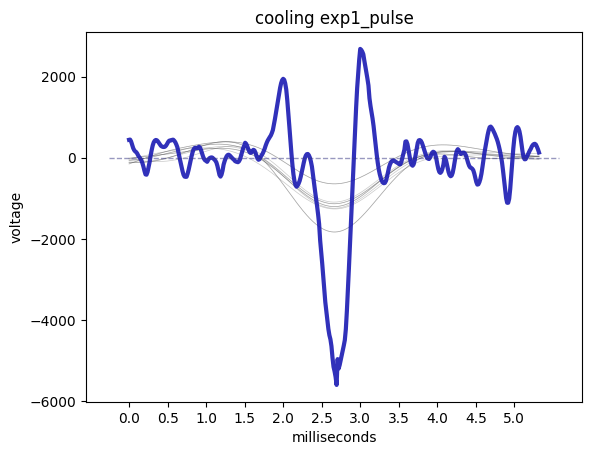

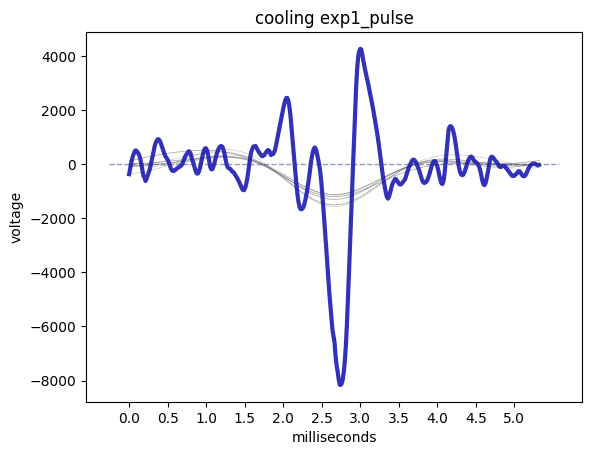

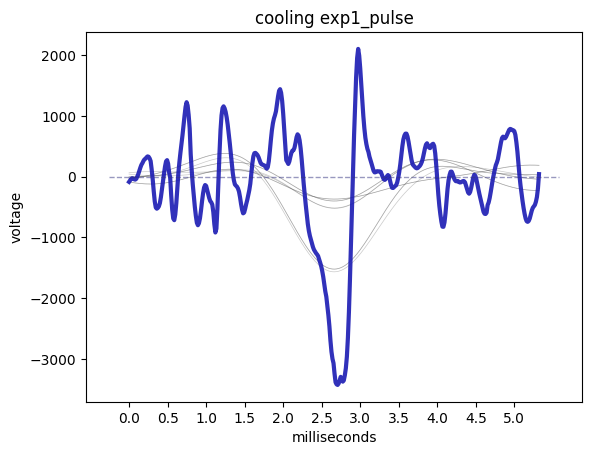

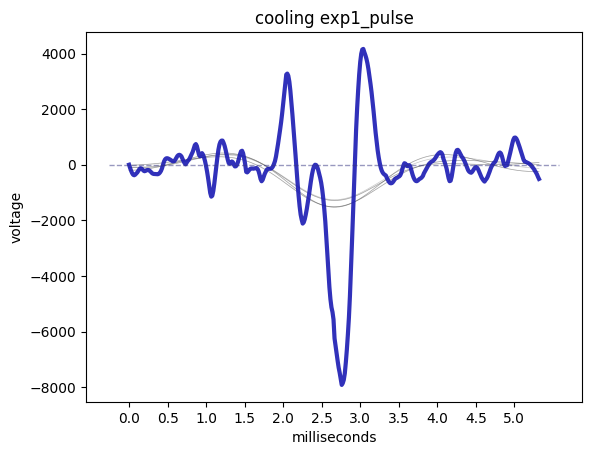

In [ ]:
bgg = []
nS = []
nA = []
for ppu in pulse_data:

    data_full = []
    for ee in ppu[:2]:
        data_full+=list(ee)

    dtest = data_full[:35000] - np.nanmean(data_full[:35000])
    x_fil_II = sg.filtfilt(b, a, dtest)
    thresh = np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2)
    peaks, _ = find_peaks(x_fil_II*-1,height=thresh)

    plt.figure()

    window1 = 200
    tt = []
    nS.append(len(peaks))

    for ele in peaks:
        if ele - window1 <=0:continue
        if ele + window1 >=len(x_fil_II):continue
        plt.plot(np.arange(window1*2),x_fil_II[ele-window1:ele+window1],linewidth=0.5,color=(0.3,0.3,0.3,0.3))
        tt.append(dtest[ele-window1:ele+window1])
        bgg.append(dtest[ele-window1:ele+window1])
        nA.append(np.nanmax(dtest[ele-window1:ele+window1]))
    airT = tt.copy()
    a1 = plt.axis()
    #plt.plot([window1,window1],[a1[2],a1[3]],linewidth=3,linestyle='--',color=(0.65,0.2,0.2,0.75),label='alignment')
    #plt.legend()

    plt.plot(np.arange(window1*2),np.nanmean(tt,0),linewidth=3,color=(0.1,0.1,0.7,0.9))

    tt = ((window1/(13*50))*2)+1
    tt = np.arange(0,window1*2,37.5)
    oo = plt.xticks(tt,np.arange(0,0.5*len(tt),0.5))
    plt.xlabel('milliseconds')
    plt.ylabel('voltage')
    plt.plot([a1[0],a1[1]],[0,0],linewidth=1,linestyle='--',color=(0.2,0.2,0.5,0.5),label='alignment')
    plt.title(videoPath.split('/')[-1])

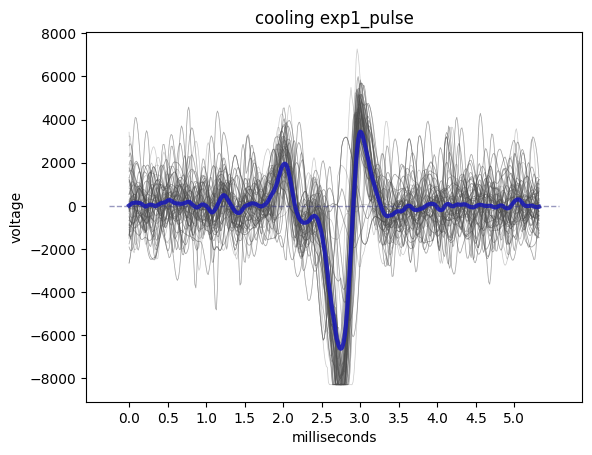

In [ ]:
for ele in bgg:
  plt.plot(np.arange(window1*2),ele,linewidth=0.5,color=(0.3,0.3,0.3,0.3))

plt.plot(np.arange(window1*2),np.nanmean(bgg,0),linewidth=3,color=(0.1,0.1,0.7,0.9))
tt = ((window1/(13*50))*2)+1
tt = np.arange(0,window1*2,37.5)
oo = plt.xticks(tt,np.arange(0,0.5*len(tt),0.5))
plt.xlabel('milliseconds')
plt.ylabel('voltage')
plt.plot([a1[0],a1[1]],[0,0],linewidth=1,linestyle='--',color=(0.2,0.2,0.5,0.5),label='alignment')
plt.title(videoPath.split('/')[-1])
plt.savefig('/content/%s/%s_average.png'%(videoPath.split('/')[-1],videoPath.split('/')[-1]),dpi=100)

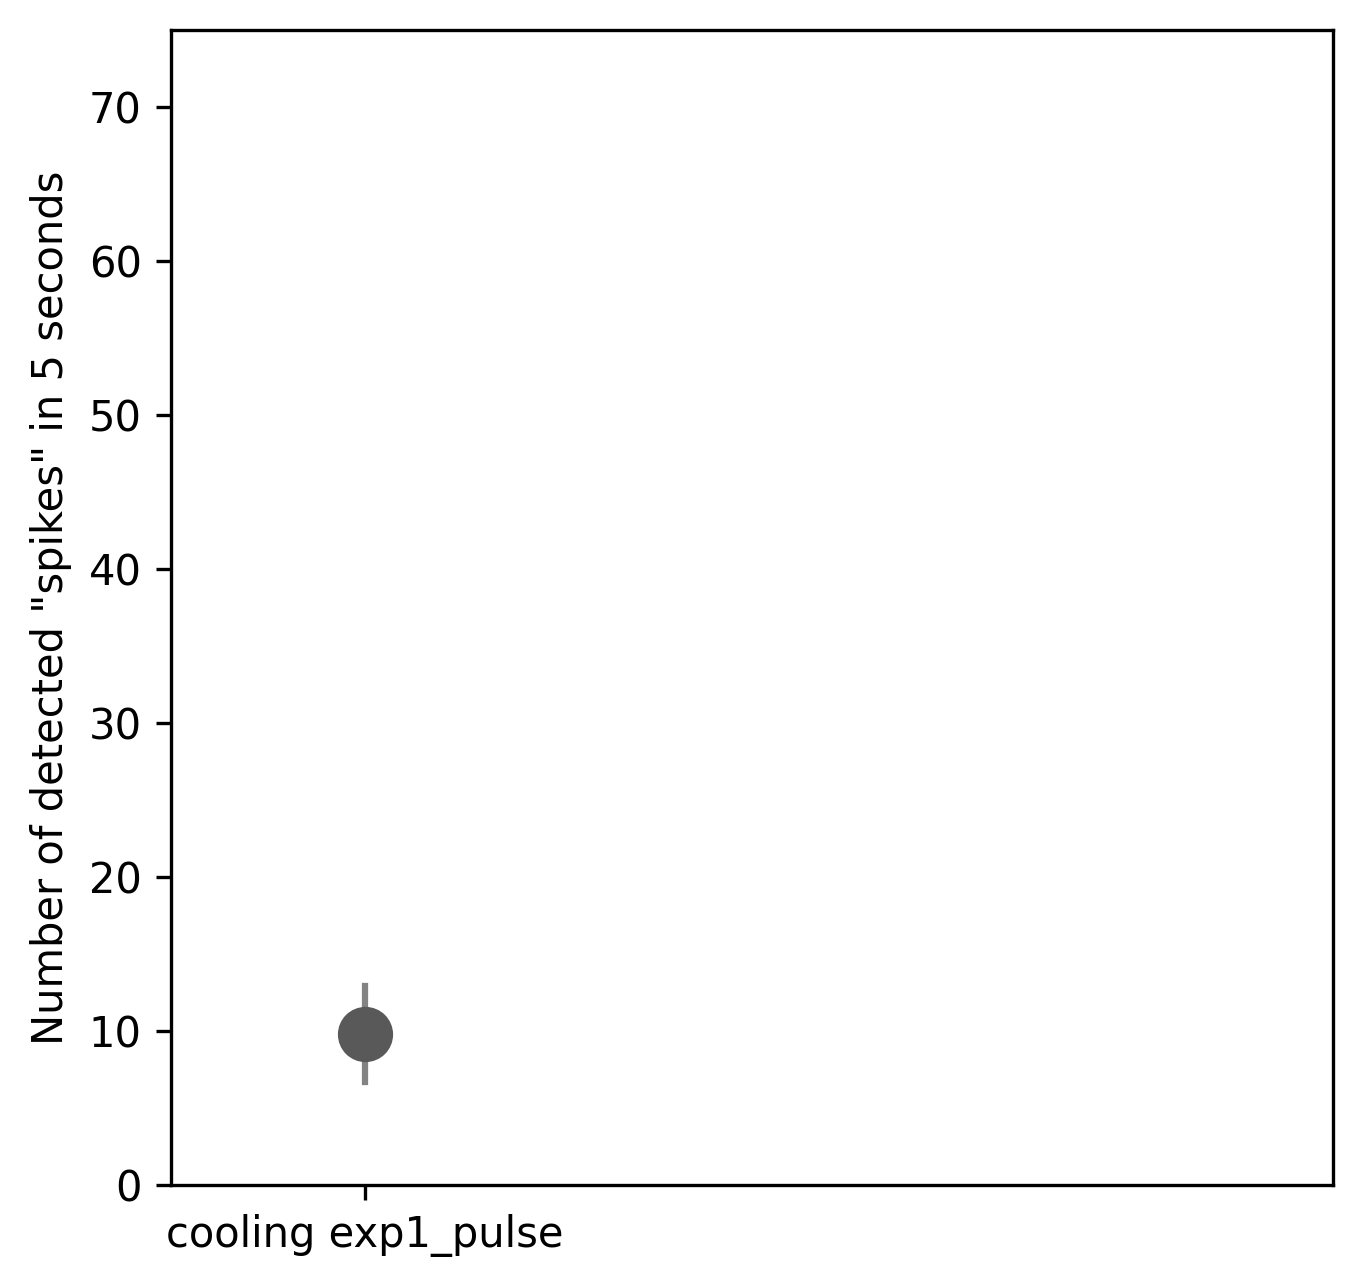

In [ ]:
plt.figure(figsize=(5,5),dpi=300)
plt.ylabel('Number of detected "spikes" in 5 seconds')


sem1 = np.nanmean(nS)/np.sqrt(len(nS))
plt.plot([0,0],[np.nanmean(nS)-sem1,np.nanmean(nS)+sem1],color=(0.35,0.35,0.35,0.75))


plt.scatter([0],[np.nanmean(nS)],color=(0.35,0.35,0.35),s=150)

plt.xticks([0],['%s'%videoPath.split('/')[-1]])
plt.axis([-0.25,1.25,0,75])
plt.savefig('/content/%s/SpikeNumber%s.png'%(videoPath.split('/')[-1],videoPath.split('/')[-1]),dpi=300)

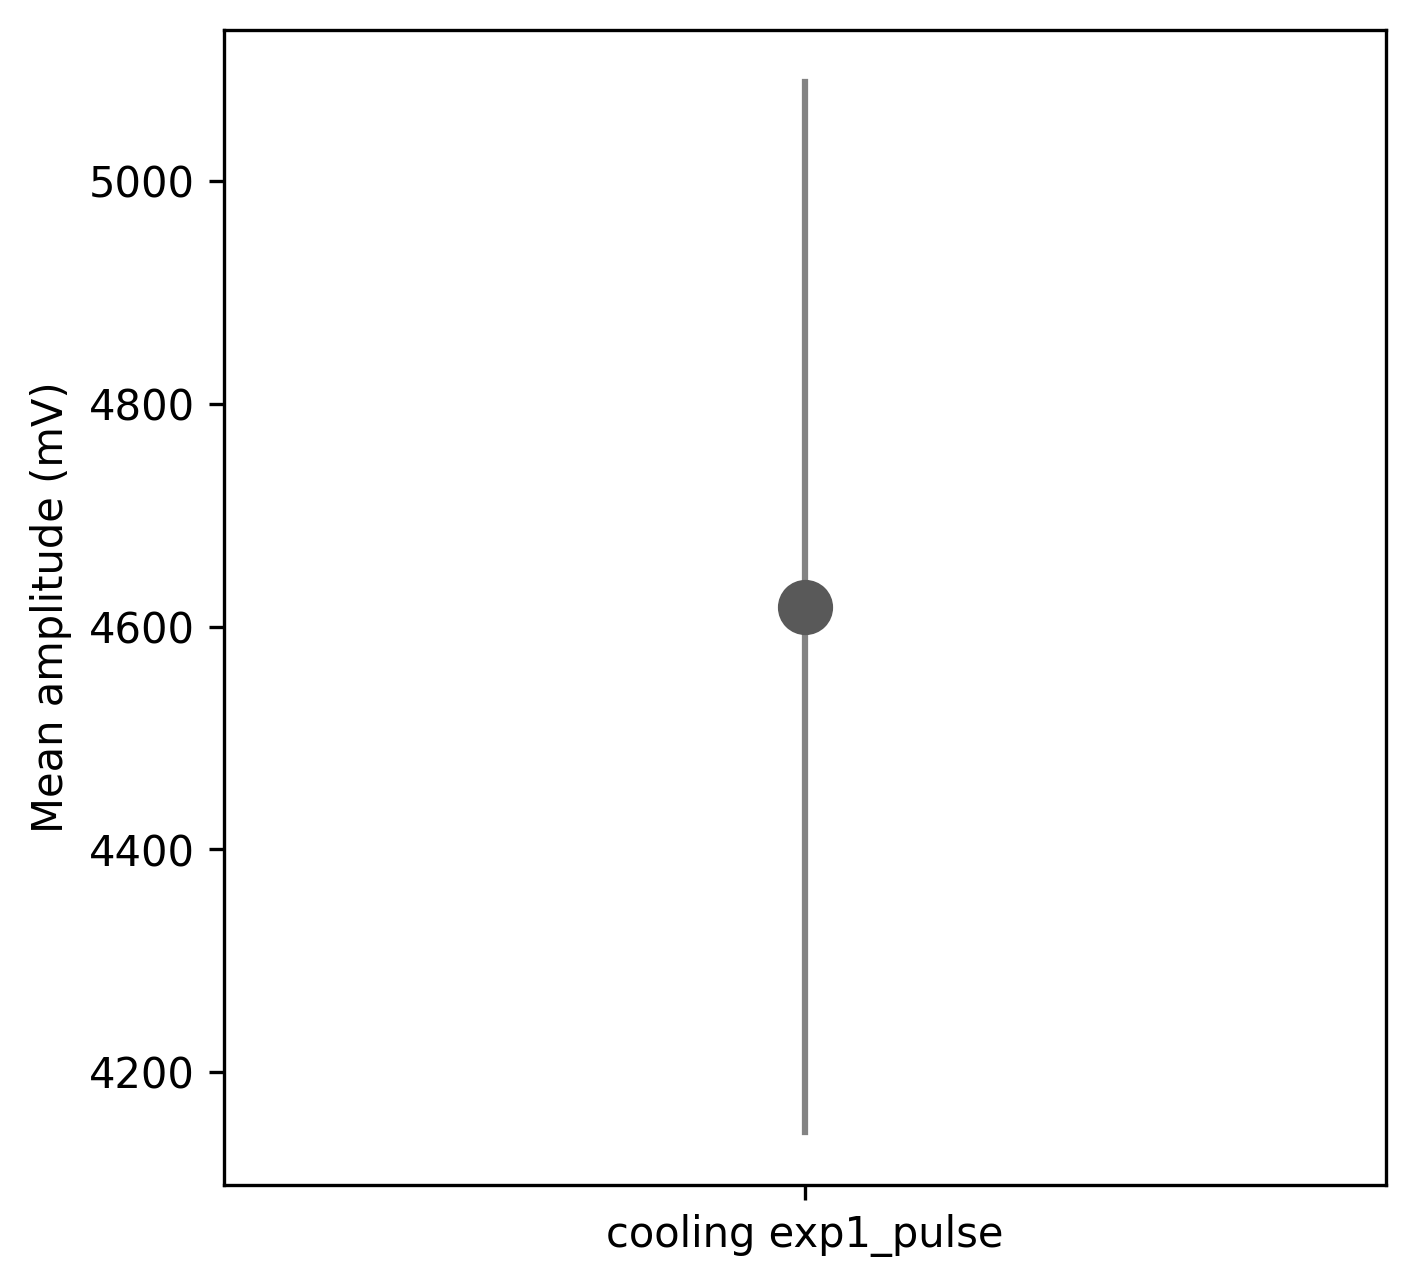

In [ ]:
plt.figure(figsize=(5,5),dpi=300)
plt.ylabel('Mean amplitude (mV)')


sem1 = np.nanmean(nA)/np.sqrt(len(nA))
plt.plot([0,0],[np.nanmean(nA)-sem1,np.nanmean(nA)+sem1],color=(0.35,0.35,0.35,0.75))


plt.scatter([0],[np.nanmean(nA)],color=(0.35,0.35,0.35),s=150)

plt.xticks([0],['%s'%videoPath.split('/')[-1]])
#plt.axis([-0.25,1.25,0,75])
plt.savefig('/content/%s/AmplitudeAvg_%s.png'%(videoPath.split('/')[-1],videoPath.split('/')[-1]),dpi=300)

In [ ]:
#!zip /content/red.test_pulse.zip /content/red.test_pulse/ -r

  adding: content/red.test_pulse/ (stored 0%)
  adding: content/red.test_pulse/red.test_pulse_average.png (deflated 4%)
  adding: content/red.test_pulse/red.test_pulse_spikePeaks.png (deflated 7%)
  adding: content/red.test_pulse/AmplitudeAvg_red.test_pulse.png (deflated 29%)
  adding: content/red.test_pulse/SpikeNumberred.test_pulse.png (deflated 27%)
